In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('Customer.csv' , usecols = ['Age', 'AnnualIncome','NumberOfPurchases', 'TimeSpentOnWebsite','PurchaseStatus'])

In [31]:
df.head()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,PurchaseStatus
0,40,66120.267939,8,30.568601,1
1,20,23579.773583,4,38.240097,0
2,27,127821.306432,11,31.633212,1
3,24,137798.623120,19,46.167059,1
4,31,99300.964220,19,19.823592,1


In [51]:
df['AnnualIncome'] = df['AnnualIncome'].round()
df['TimeSpentOnWebsite'] = df['TimeSpentOnWebsite'].round()

In [53]:
df.head()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,PurchaseStatus
0,40,66120.0,8,31.0,1
1,20,23580.0,4,38.0,0
2,27,127821.0,11,32.0,1
3,24,137799.0,19,46.0,1
4,31,99301.0,19,20.0,1


In [73]:
X = df.drop(columns=['PurchaseStatus'])
Y = df['PurchaseStatus']

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [87]:
X_train.shape, X_test.shape

((1200, 4), (300, 4))

# Standard Scalar

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit the scalar to the training set, it will learn the parameters
sc.fit(X_train)

# Transform train and test sets
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [96]:
sc.mean_

array([4.41650000e+01, 8.49465683e+04, 1.03000000e+01, 3.05591667e+01])

In [100]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [107]:
np.round(X_train.describe(), 2)

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite
count,1200.00,1200.00,1200.00,1200.00
mean,44.16,84946.57,10.30,30.56
std,15.44,37630.56,5.89,16.97
min,18.00,20002.00,0.00,1.00
25%,31.00,53785.00,5.00,16.00
50%,45.00,85211.50,11.00,31.00
75%,57.00,117659.50,15.00,44.00
max,70.00,149785.00,20.00,60.00


In [111]:
np.round(X_train_scaled.describe(), 2)

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite
count,1200.00,1200.00,1200.00,1200.00
mean,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.70,-1.73,-1.75,-1.74
25%,-0.85,-0.83,-0.90,-0.86
50%,0.05,0.01,0.12,0.03
75%,0.83,0.87,0.80,0.79
max,1.67,1.72,1.65,1.74


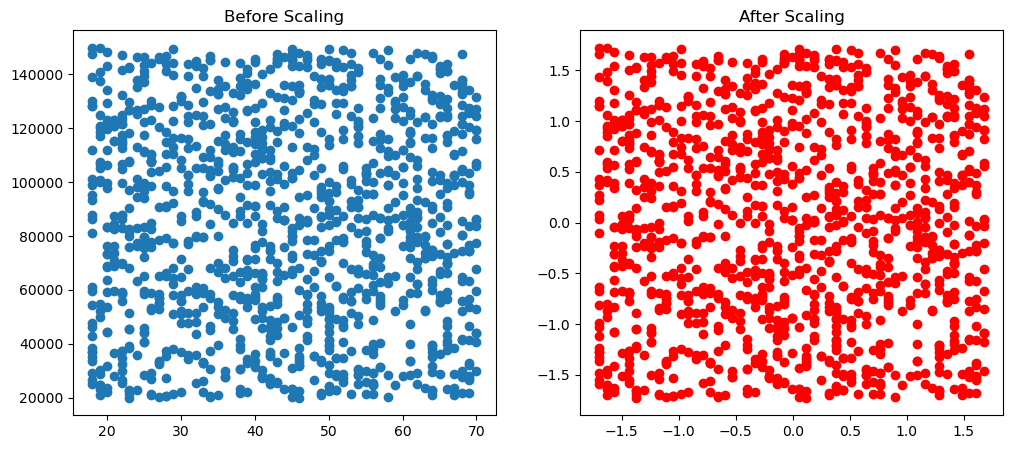

In [113]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['AnnualIncome'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['AnnualIncome'],color='red')
ax2.set_title("After Scaling")
plt.show()

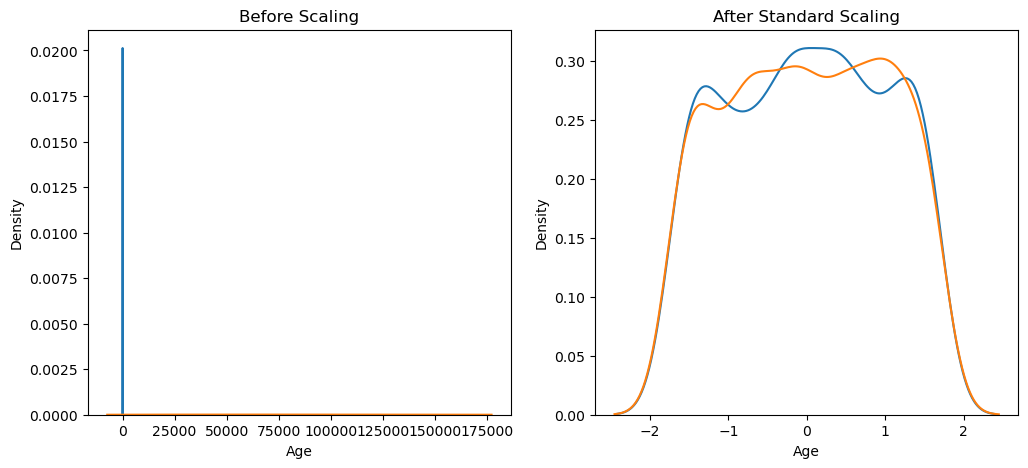

In [115]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['AnnualIncome'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['AnnualIncome'], ax=ax2)
plt.show()

In [117]:
from sklearn.linear_model import LogisticRegression

In [119]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [121]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

C:\Users\yasir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [125]:
from sklearn.metrics import accuracy_score

In [129]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_scaled))

0.69
0.69


# Practice Exercise

In [182]:
df = pd.read_csv('Social_Network_Ads.csv', usecols=['Age','EstimatedSalary','Purchased'])

In [145]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
# 1. import essential libraries
# 2. Separate the dataset into two parts: train and test set
# 3. Apply Standardization
# 4. Apply graphs to see the scale
# 5. Apply learner to see the actual results

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [184]:
# Dividing the dataset
X = df.drop(columns=['Purchased'])
Y = df['Purchased']

In [153]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [155]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [186]:
# Apply train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [188]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [190]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [193]:
scaler.mean_

array([3.75750000e+01, 7.05892857e+04])

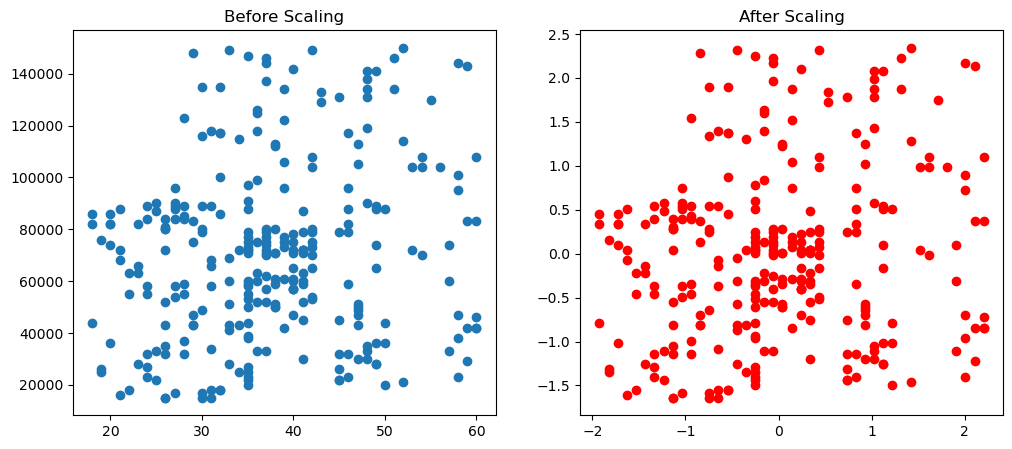

In [195]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [197]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [199]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [201]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_scaled))

0.85
0.85
